In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%config InlineBackend.figure_format = 'svg' 
plt.style.use('bmh')
plt.rcParams['image.cmap'] = 'Paired_r'
%matplotlib inline
from sklearn.linear_model import LogisticRegression


### 1. Dataset

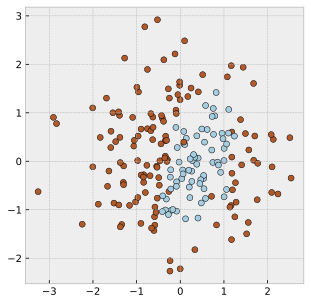

In [83]:
np.random.seed(5)

def f(X):
    X = X.copy()
    X[:,0] -= 0.4
    X[:,1] += 0.2
    return 1.1*X[:,0]**2 + 0.3*X[:,1]**2 - 0.6*X[:,0]*X[:,1]
def make_data():
    N = 200
    X = np.random.normal(size=(N, 2))
    Y = f(X) < 0.5
    X += np.random.normal(size=(N,2), scale=0.2)
    return X, Y
X, Y = make_data()


plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k');


In [84]:
Y = Y.astype(int)
print(Y.shape)
Y = Y.reshape(-1,1)

(200,)


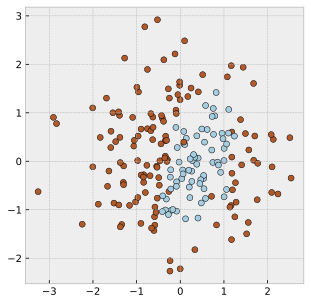

In [85]:
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
# plt.show()

#### Split data into train and test sets


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# BIC

#### Normalize features

In [87]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [88]:
def mapFeature(X1, X2, degree):
    res = np.ones(X1.shape[0])
    for i in range(1,degree + 1):
        for j in range(0,i + 1):
            res = np.column_stack((res, (X1 ** (i-j)) * (X2 ** j)))
    return res
degree=5
Poly_X=mapFeature(X_train_normalized[:, 0],X_train_normalized[:, 1],degree)
print(Poly_X)
print(Poly_X.shape)

[[ 1.00000000e+00 -1.39332043e+00  2.71257433e-01 ...  3.87477913e-02
  -7.54358167e-03  1.46861595e-03]
 [ 1.00000000e+00 -8.15175165e-01 -1.87623386e-02 ... -4.38897176e-06
  -1.01018012e-07 -2.32506364e-09]
 [ 1.00000000e+00  7.78418292e-01  2.16921074e-01 ...  6.18488036e-03
   1.72353464e-03  4.80295734e-04]
 ...
 [ 1.00000000e+00 -6.86391327e-01 -5.01737644e-01 ... -5.95077641e-02
  -4.34989257e-02 -3.17968011e-02]
 [ 1.00000000e+00 -1.12924914e-01 -3.86196967e-01 ... -7.34524206e-04
  -2.51203221e-03 -8.59101142e-03]
 [ 1.00000000e+00 -1.05214872e-01 -2.23116009e-01 ... -1.22955075e-04
  -2.60735438e-04 -5.52909008e-04]]
(160, 21)


### 2. Modèle


In [89]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [90]:
def initialisation(X):
    np.random.seed(0)
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [91]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [92]:
epsilon = 1e-15  # Small epsilon value to avoid division by zero in log

def log_loss(y, A):
    return 1/len(y) * np.sum(y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [93]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [94]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [95]:
def predict(X, W, b):
    A = modele(X, W, b)
    return A >= 0.5

### 5. Modèle final

In [96]:
def regression_logistique(X, y, learning_rate=0.01, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.01)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

C:\Users\hp\AppData\Local\Temp\ipykernel_13396\564215380.py:4: RuntimeWarning: divide by zero encountered in log
  return 1/len(y) * np.sum(y * np.log(A) - (1 - y) * np.log(1 - A))


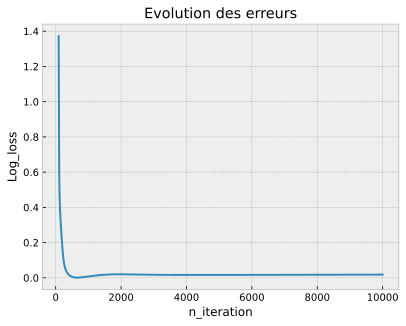

In [97]:
W,b=regression_logistique(Poly_X, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [98]:
# Compute accuracy for train set
y_train_pred = predict(mapFeature(X_train_normalized[:, 0], X_train_normalized[:, 1], degree), W, b)
if y_train.ndim > 1 and y_train.shape[1] > 1:
    # Convert y_train_pred to 1-dimensional array
    y_train_pred = np.argmax(y_train_pred, axis=1)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Compute accuracy for test set
y_test_pred = predict(mapFeature(X_test_normalized[:, 0], X_test_normalized[:, 1], degree), W, b)
if y_test.ndim > 1 and y_test.shape[1] > 1:
    # Convert y_test_pred to 1-dimensional array
    y_test_pred = np.argmax(y_test_pred, axis=1)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", np.round(train_accuracy * 100), "%")
print("Test Accuracy:", np.round(test_accuracy * 100), "%")


Train Accuracy: 96.0 %
Test Accuracy: 92.0 %


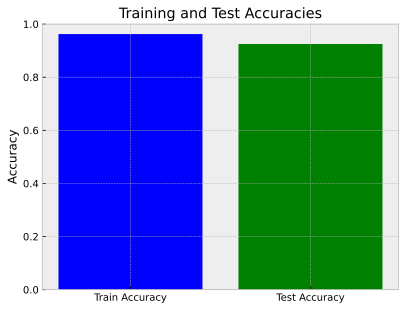

In [108]:
# Visualize accuracies
labels = ['Train Accuracy', 'Test Accuracy']
accuracies = [train_accuracy, test_accuracy]

plt.bar(labels, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracies')
plt.ylim(0, 1)  # Set y-axis limit to ensure proper visualization of percentages
plt.show()

In [99]:
from sklearn.metrics import confusion_matrix
y_pred = predict(Poly_X, W, b)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[96  5]
 [ 1 58]]


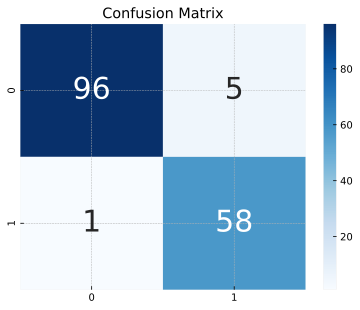

In [100]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

u [-3.         -2.89795918 -2.79591837 -2.69387755 -2.59183673 -2.48979592
 -2.3877551  -2.28571429 -2.18367347 -2.08163265 -1.97959184 -1.87755102
 -1.7755102  -1.67346939 -1.57142857 -1.46938776 -1.36734694 -1.26530612
 -1.16326531 -1.06122449 -0.95918367 -0.85714286 -0.75510204 -0.65306122
 -0.55102041 -0.44897959 -0.34693878 -0.24489796 -0.14285714 -0.04081633
  0.06122449  0.16326531  0.26530612  0.36734694  0.46938776  0.57142857
  0.67346939  0.7755102   0.87755102  0.97959184  1.08163265  1.18367347
  1.28571429  1.3877551   1.48979592  1.59183673  1.69387755  1.79591837
  1.89795918  2.        ] 

U= [[-3.         -2.89795918 -2.79591837 ...  1.79591837  1.89795918
   2.        ]
 [-3.         -2.89795918 -2.79591837 ...  1.79591837  1.89795918
   2.        ]
 [-3.         -2.89795918 -2.79591837 ...  1.79591837  1.89795918
   2.        ]
 ...
 [-3.         -2.89795918 -2.79591837 ...  1.79591837  1.89795918
   2.        ]
 [-3.         -2.89795918 -2.79591837 ...  1.79591837 

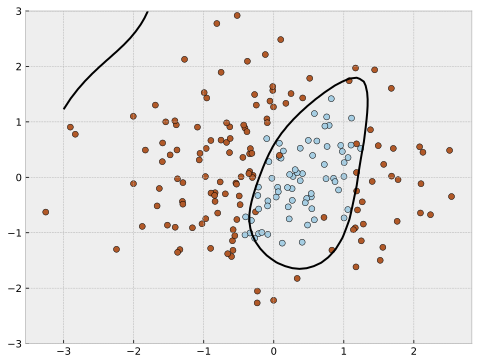

In [101]:
plt.figure(figsize=(8, 6))
# plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
# plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.winter, s=50, edgecolors='k')
u = np.linspace(-3, 2, 50)
v = np.linspace(-3, 3, 50)
print('u',u,'\n')
U,V = np.meshgrid(u,v)
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
print('U=',U,'\n')
print('V=',V,'\n')

U = np.ravel(U)
V = np.ravel(V)

print('U applati=',U,'\n')
print('V applati=',V,'\n')
Z = np.zeros((len(u) * len(v)))

    
# Feature mapping
X_poly = mapFeature(U, V, degree)
Z = X_poly.dot(W)+b

print('Z=', Z,'\n')

# reshape U, V, Z back to matrix
U = U.reshape((len(u), len(v)))
print('U.shape',U.shape)

V = V.reshape((len(u), len(v)))
print('V.shape',V.shape)

Z = Z.reshape((len(u), len(v)))
print('Z.shape',Z.shape)

plt.grid(True)
plt.contour(U,V,Z,levels=[0],cmap= "Greys_r")

In [107]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


max_degree = 11
bic_values = []
models = []

for degree in range(1, max_degree + 1):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    model = LogisticRegression(max_iter=10000)  # Increase max_iter parameter
    model.fit(X_train_poly, y_train)
    num_params = X_train_poly.shape[1]
    y_train_pred = model.predict(X_train_poly)
    log_likelihood = -0.5 * len(X_train) * np.log(mean_squared_error(y_train, y_train_pred))
    bic = -2 * log_likelihood + num_params * np.log(len(X_train))
    bic_values.append(bic)
    models.append(model)

best_model_idx = np.argmin(bic_values)
best_model = models[best_model_idx]
best_degree = best_model_idx + 1

print(f"Best polynomial degree: {best_degree}")


Best polynomial degree: 2


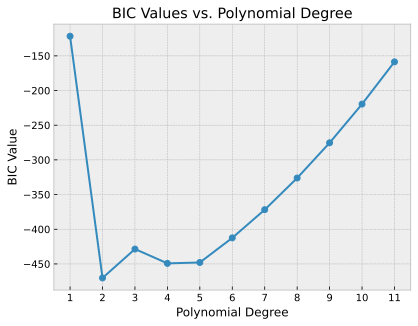

In [109]:
# Plot BIC values vs. polynomial degree
plt.plot(range(1, max_degree+1), bic_values, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('BIC Value')
plt.title('BIC Values vs. Polynomial Degree')
plt.xticks(range(1, max_degree+1))
plt.grid(True)
plt.show()